# MA-双曲线

## 5/10短线操作指标；30/60 中期；120/240长期
## 均线技术方法：MA=(C1+C2+C3+...+Cn)/N

In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, date

In [2]:
df = pd.read_hdf('./data/gfs.h5', 'df')

In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-28 00:00:00-04:00,47.009998,48.000000,44.480000,46.400002,46.400002,18618900
2021-10-29 00:00:00-04:00,46.000000,49.480000,45.610001,48.740002,48.740002,4639400
2021-11-01 00:00:00-04:00,54.270000,59.990002,53.060001,53.869999,53.869999,9946500
2021-11-02 00:00:00-04:00,57.507999,58.615002,55.000000,56.419998,56.419998,4122500
2021-11-03 00:00:00-04:00,57.000000,59.380001,56.169998,59.000000,59.000000,2642300
...,...,...,...,...,...,...
2023-03-15 00:00:00-04:00,64.959999,65.400002,62.959999,64.750000,64.750000,1678600
2023-03-16 00:00:00-04:00,64.540001,67.180000,64.120003,66.769997,66.769997,1200500
2023-03-17 00:00:00-04:00,66.629997,67.699997,65.440002,66.459999,66.459999,1993800


### MA

In [6]:
ma5 = df['Close'].rolling(5,min_periods=1).mean()  # min_periods=1 不足5个时，最少为1个技术均值
ma30 = df['Close'].rolling(30,min_periods=1).mean()

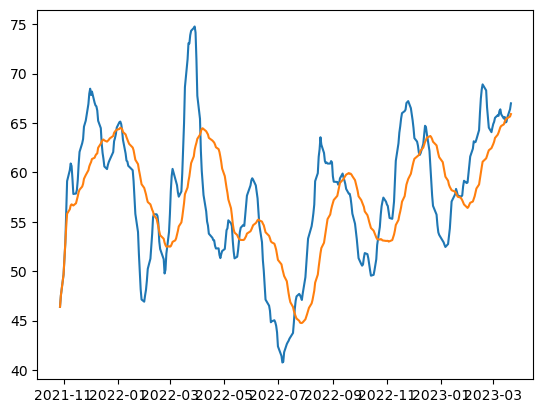

In [10]:
%matplotlib inline
plt.plot(ma5)
plt.plot(ma30)

### 找出交叉点。短期上穿长期为买入点，下穿为卖出点

#### method-1

In [13]:
buy_filt = (ma5>ma30) & (ma5.shift(-1)<ma30.shift(-1))

In [14]:
sell_filt = (ma5<ma30) & (ma5.shift(-1)>ma30.shift())

In [22]:
buy_date = df[buy_filt].index

In [23]:
sell_date = df[sell_filt].index

In [40]:
s_buy = pd.Series(data=1,index=buy_date)
s_sell = pd.Series(data=0,index=sell_date)


In [41]:
s_bs = s_buy.append(s_sell)
s_bs = s_bs.sort_index()
s_bs

/var/folders/rz/6rwl1std7dz1npfq_pm66bfr0000gn/T/ipykernel_46826/3201635840.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s_bs = s_buy.append(s_sell)


Date
2021-12-30 00:00:00-05:00    0
2021-12-31 00:00:00-05:00    1
2022-02-11 00:00:00-05:00    1
2022-02-25 00:00:00-05:00    0
2022-02-28 00:00:00-05:00    1
2022-05-18 00:00:00-04:00    0
2022-05-19 00:00:00-04:00    1
2022-07-20 00:00:00-04:00    1
2022-10-21 00:00:00-04:00    0
2022-10-24 00:00:00-04:00    1
2022-12-08 00:00:00-05:00    0
2022-12-09 00:00:00-05:00    0
2022-12-12 00:00:00-05:00    1
2023-01-17 00:00:00-05:00    0
2023-01-18 00:00:00-05:00    1
2023-03-16 00:00:00-04:00    0
2023-03-17 00:00:00-04:00    1
dtype: int64

#### method-2

In [19]:
c1 = ma5<ma30
c2 = ma5>ma30

In [24]:
d_date = df[c1 & c2.shift(1)].index

In [25]:
g_date = df[~(c1|c2.shift(1))].index

In [26]:
s_g = pd.Series(data=1,index=g_date) # G's value set 1
s_d = pd.Series(data=0,index=d_date) # D's value 0

In [33]:
s = s_g.append(s_d)
s = s.sort_index()

/var/folders/rz/6rwl1std7dz1npfq_pm66bfr0000gn/T/ipykernel_46826/2191697202.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s = s_g.append(s_d)


In [46]:
s = s['2022-01':'2022-12']

In [47]:
s

Date
2022-01-06 00:00:00-05:00    0
2022-02-11 00:00:00-05:00    1
2022-02-17 00:00:00-05:00    0
2022-02-28 00:00:00-05:00    1
2022-04-05 00:00:00-04:00    0
2022-05-19 00:00:00-04:00    1
2022-06-10 00:00:00-04:00    0
2022-07-20 00:00:00-04:00    1
2022-09-14 00:00:00-04:00    0
2022-10-24 00:00:00-04:00    1
2022-12-08 00:00:00-05:00    0
2022-12-12 00:00:00-05:00    1
2022-12-19 00:00:00-05:00    0
dtype: int64

In [64]:
# 使用买卖点，回测2022年GFS的收益情况
init = 100000  # 初始资金 
money = init   # 资金变动，买卖操作
stock = 0  # 初始股票数量

for i in range(len(s)):
    # 0-sell; 1-buy
    if s[i] == 1: # buy
        # 基于money，尽可能买入全部股票
        # 获取股票的单价（买点时间对应的开盘价）
        datetime = s.index[i]
        p = df.loc[datetime]['Open']
        stock = (money // (p*100)) * 100
        
        money -= stock * p # 买股票后，剩余
        print(f"{datetime} BUY,Open{p} Stock{stock} Money{money}")
    else: # sell all stock
        # 找卖出当日 收盘价
        datetime = s.index[i]
        p = df.loc[datetime]['Close']
        
        money += p * stock  # 卖出股票收入
        stock = 0
        print(f"{datetime} SELL,Close{p} Stock{stock} Money{money}")

# 最后一天未卖出股票，以当前收盘价计算
remain_money = stock * df['Close'][-1] 

# 最后总资金
money += remain_money

print(f"Final: {money} Income{money-init}, {(money-init)/init*100}")

2022-01-06 00:00:00-05:00 SELL,Close61.5099983215332 Stock0 Money100000.0
2022-02-11 00:00:00-05:00 BUY,Open57.68000030517578 Stock1700.0 Money1943.9994812011719
2022-02-17 00:00:00-05:00 SELL,Close48.95000076293945 Stock0 Money85159.00077819824
2022-02-28 00:00:00-05:00 BUY,Open55.779998779296875 Stock1500.0 Money1489.0026092529297
2022-04-05 00:00:00-04:00 SELL,Close58.400001525878906 Stock0 Money89089.00489807129
2022-05-19 00:00:00-04:00 BUY,Open53.0 Stock1600.0 Money4289.004898071289
2022-06-10 00:00:00-04:00 SELL,Close51.75 Stock0 Money87089.00489807129
2022-07-20 00:00:00-04:00 BUY,Open46.59000015258789 Stock1800.0 Money3227.004623413086
2022-09-14 00:00:00-04:00 SELL,Close58.31999969482422 Stock0 Money108203.00407409668
2022-10-24 00:00:00-04:00 BUY,Open55.25 Stock1900.0 Money3228.0040740966797
2022-12-08 00:00:00-05:00 SELL,Close62.41999816894531 Stock0 Money121826.00059509277
2022-12-12 00:00:00-05:00 BUY,Open64.05999755859375 Stock1900.0 Money112.00523376464844
2022-12-19 00